In [3]:
import pandas as pd
import re,os,glob
import numpy as np
from ete3 import Tree,NCBITaxa
from matplotlib import rc
import collections
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

ncbi = NCBITaxa()
#ncbi.update_taxonomy_database()

%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
#rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':12})
TREE_DIR = '/Users/daviddylus/Projects/r2t/yeast/'
#tree_file = '/Users/daviddylus/mnt/monthly/yeast/ass4.fa.contree'
tree_file = '/Volumes/Recovery 1/projects/r2t/yeast/yeast_phylogeny/r2t_435/like_shen_2018/concat.fa.contree'
#tree_file = 'd7d5073298daea4753db88f67a01efb71874913f.phy.treefile'
# sra_file = '/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/yeast_sra_all.csv'
# ref_file = '/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/ref_species_id.csv'

rokas_tree = '/Users/daviddylus/Projects/r2t/yeast/1_molecular_phylogenetics/1_27phylogenetic_trees/343_2408OGs.treefile'
# rokas_names = pd.read_csv('/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/rokas_names_classification.csv')
# r2t_names = pd.read_csv('/Users/daviddylus/projects/r2t/yeast/yeast_phylogeny/r2t_385/r2t_names_classifications.csv')
# rokas_names.head()

all_names = pd.read_csv('/Users/daviddylus/Projects/r2t/yeast/FINAL_combined.csv')
all_names = all_names.fillna('')
all_names.head()

,taxid,rokas_tree_id,rokas_name,rokas_clade,r2t_tree_id,r2t_name,clade,order,genus,family,use,dataset_origin,r2t_qmarks,r2t_seq_len,r2t_dashes,r2t_xxs,rokas_qmarks,rokas_seq_len,rokas_dashes,rokas_xxs
0,43968,yHMPu5000034654_Aciculoconidium_aculeatum,Aciculoconidium aculeatum,CUG-Ser1,ACIAC_1,Aciculoconidium aculeatum,saccharomyceta,Saccharomycetales,Aciculoconidium,Debaryomycetaceae,Aciculoconidium aculeatum,Shen new,0.071200,0.760035,0.097661,0.071104,0.0,0.888895,0.044483,0.066622
1,54196,Alloascoidea_hylecoeti,Alloascoidea hylecoeti,Alloascoideaceae,ALLHY_1,Alloascoidea hylecoeti,saccharomyceta,Saccharomycetales,Alloascoidea,Alloascoideaceae,Alloascoidea hylecoeti,This study,0.054437,0.415776,0.132154,0.397633,0.0,0.892511,0.047687,0.059802
2,53487,yHMPu5000026137_Ambrosiozyma_ambrosiae,Ambrosiozyma ambrosiae,Pichiaceae,AMBAM_1,Ambrosiozyma ambrosiae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma ambrosiae,Shen new,0.072012,0.680842,0.138069,0.109078,0.0,0.895328,0.036399,0.068273
3,489715,Ambrosiozyma_kashinagacola,Ambrosiozyma kashinagacola,Pichiaceae,AMBKA_1,Ambrosiozyma kashinagacola,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma kashinagacola,This study,0.066941,0.489771,0.133046,0.310242,0.0,0.902893,0.037292,0.059815
4,904902,yHMPu5000035040_Ambrosiozyma_maleeae,Ambrosiozyma maleeae,Pichiaceae,AMBMA_1,Ambrosiozyma maleeae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma maleeae,Shen new,0.069088,0.604757,0.133855,0.192299,0.0,0.895989,0.036583,0.067427


# Read in trees

In [4]:
# rokas tree
rt = Tree(rokas_tree)
for leaf in rt:
    if leaf.name in list(all_names['rokas_tree_id']):
        sub_df = all_names.loc[all_names['rokas_tree_id'] == leaf.name]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        new_name = leaf.name.replace('_',' ')
        print(leaf.name)
        leaf.name = new_name
rt.set_outgroup( rt&"Schizosaccharomyces pombe" )
rt.ladderize()

# rt.write(format=1, outfile=os.path.join(TREE_DIR,tree_file.split('.')[0]+'.rokas.adapted.nwk')) 
#rt.write(format=2, outfile=os.path.join('/Users/daviddylus/Desktop/rokas.adapted.nwk')) 

# print(rt)

343

# Adjust names of tree leaves

In [5]:
# r2t tree
t = Tree(tree_file)
#t.prune([sp for sp in t.get_leaf_names() if sp not in ['BREsp_1', 'KLULA_1', 'TRIPE_1']])

for leaf in t:
    if leaf.name in list(all_names['r2t_tree_id']):
        sub_df = all_names.loc[all_names['r2t_tree_id'] == leaf.name]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        print(leaf.name)
t.set_outgroup( t&"Schizosaccharomyces pombe" )
t.ladderize()
#t.write(format=2, outfile=os.path.join('/Users/daviddylus/Desktop/r2t.adapted.nwk'))


435

# Get ncbi taxonomy reference tree
use the leaves from the given tree to get the ncbi reference tree

In [6]:
# flatten list of taxids
taxid = list(all_names['taxid'])
# get the tree
tree = Tree(ncbi.get_topology(taxid).write(), format=1)

# transfer species ids to their filenames used for the computation
for leaf in tree.get_leaves():
    if int(leaf.name) in taxid:
        sub_df = all_names.loc[all_names['taxid'] == int(leaf.name)]
        new_name = list(sub_df['use'])
        leaf.name = new_name[0]
    else:
        print(leaf.name)
print(len(tree.get_leaf_names()))
tree.set_outgroup( tree&"Schizosaccharomyces pombe" )
tree.ladderize()
# tree.write(format=1, outfile=os.path.join(TREE_DIR,'ncbi.nwk') )

2813651
2528786
412


412

# Find common leaf set

In [7]:
common_leaves = list(set(t.get_leaf_names()) & set(rt.get_leaf_names()))
common_leaves = list(set(common_leaves) & set(tree.get_leaf_names()))
common_leaves = [sp for sp in common_leaves if sp not in 'Naumovozyma dairenensis']
print('The number of common leaves between our and rokas tree is: {}'.format(len(common_leaves)))
prune_t = [l for l in t.get_leaf_names() if l not in common_leaves]
print('The number of leaves to be pruned from our tree is: {}'.format(len(prune_t)))
prune_rt = [l for l in rt.get_leaf_names() if l not in common_leaves]
print('The number of leaves to be pruned from rokas tree is: {}'.format(len(prune_rt)))
t.prune(common_leaves)
t.write(format=2, outfile=os.path.join(TREE_DIR,'r2t_trim.nwk') )
rt.prune(common_leaves)
rt.write(format=2, outfile=os.path.join(TREE_DIR,'rokas_trim.nwk') )
tree.prune(common_leaves)
tree.write(format=2, outfile=os.path.join(TREE_DIR,'ncbi_trim.nwk') )

The number of common leaves between our and rokas tree is: 323
The number of leaves to be pruned from our tree is: 112
The number of leaves to be pruned from rokas tree is: 20


# Get classification for each species
for each species we find the right phylum

In [8]:
# IMPORTANT: update of the database doesn't have to be done constantly
#ncbi.update_taxonomy_database()
species_to_order = {r['use']:r['order'] for i,r in all_names.iterrows()}
genus_to_order = {r['genus']:r['order'] for i,r in all_names.iterrows()}

In [9]:
all_names

,taxid,rokas_tree_id,rokas_name,rokas_clade,r2t_tree_id,r2t_name,clade,order,genus,family,use,dataset_origin,r2t_qmarks,r2t_seq_len,r2t_dashes,r2t_xxs,rokas_qmarks,rokas_seq_len,rokas_dashes,rokas_xxs
0,43968,yHMPu5000034654_Aciculoconidium_aculeatum,Aciculoconidium aculeatum,CUG-Ser1,ACIAC_1,Aciculoconidium aculeatum,saccharomyceta,Saccharomycetales,Aciculoconidium,Debaryomycetaceae,Aciculoconidium aculeatum,Shen new,0.071200,0.760035,0.097661,0.071104,0.0,0.888895,0.044483,0.066622
1,54196,Alloascoidea_hylecoeti,Alloascoidea hylecoeti,Alloascoideaceae,ALLHY_1,Alloascoidea hylecoeti,saccharomyceta,Saccharomycetales,Alloascoidea,Alloascoideaceae,Alloascoidea hylecoeti,This study,0.054437,0.415776,0.132154,0.397633,0.0,0.892511,0.047687,0.059802
2,53487,yHMPu5000026137_Ambrosiozyma_ambrosiae,Ambrosiozyma ambrosiae,Pichiaceae,AMBAM_1,Ambrosiozyma ambrosiae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma ambrosiae,Shen new,0.072012,0.680842,0.138069,0.109078,0.0,0.895328,0.036399,0.068273
3,489715,Ambrosiozyma_kashinagacola,Ambrosiozyma kashinagacola,Pichiaceae,AMBKA_1,Ambrosiozyma kashinagacola,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma kashinagacola,This study,0.066941,0.489771,0.133046,0.310242,0.0,0.902893,0.037292,0.059815
4,904902,yHMPu5000035040_Ambrosiozyma_maleeae,Ambrosiozyma maleeae,Pichiaceae,AMBMA_1,Ambrosiozyma maleeae,saccharomyceta,Saccharomycetales,Ambrosiozyma,,Ambrosiozyma maleeae,Shen new,0.069088,0.604757,0.133855,0.192299,0.0,0.895989,0.036583,0.067427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,559307,,,Saccharomycetaceae,ZYGCB_1,Zygosaccharomyces rouxii CBS 732,saccharomyceta,Saccharomycetales,Zygosaccharomyces,Saccharomycetaceae,Zygosaccharomyces rouxii CBS 732,Shen from public,0.053167,0.903993,0.016422,0.026419,0.0,0.000000,0.000000,0.000000
439,1461763,,,Saccharomycetaceae,ZYGSA_1,Zygosaccharomyces sapae,saccharomyceta,Saccharomycetales,Zygosaccharomyces,Saccharomycetaceae,Zygosaccharomyces sapae,Shen from public,0.051157,0.915517,0.021321,0.012004,0.0,0.000000,0.000000,0.000000
440,48255,yHMPu5000034862_Zygotorulaspora_florentina,Zygotorulaspora florentina,Saccharomycetaceae,ZYGFL_1,Zygotorulaspora florentina,saccharomyceta,Saccharomycetales,Zygotorulaspora,Saccharomycetaceae,Zygotorulaspora florentina,Shen new,0.075543,0.754237,0.117982,0.052239,0.0,0.827084,0.036875,0.136041
441,42260,yHMPu5000026256_Zygotorulaspora_mrakii,Zygotorulaspora mrakii,Saccharomycetaceae,ZYGMR_1,Zygotorulaspora mrakii,saccharomyceta,Saccharomycetales,Zygotorulaspora,Saccharomycetaceae,Zygotorulaspora mrakii,Shen new,0.070197,0.734240,0.114894,0.080670,0.0,0.815938,0.035196,0.148866


# Get the order information from rokas paper

In [10]:
species_to_order = {}
# genus_to_order = {}
for i,r in all_names.iterrows():
    species_to_order[r['use']] = r['rokas_clade']


order_to_species = {}
for k,v in species_to_order.items():
    if v in order_to_species.keys():
        order_to_species[v].append(k)
    else:
        order_to_species[v] = [k]

order_color = {'Alloascoideaceae': 'darkcyan',
 'CUG-Ala': 'aliceblue',
 'CUG-Ser1': 'slategrey',
 'CUG-Ser2': 'thistle',
 'Dipodascaceae/Trichomonascaceae': 'aqua',
 'Lipomycetaceae': 'cornsilk',
 'Phaffomycetaceae': 'burlywood',
 'Pichiaceae': 'greenyellow',
 'Saccharomycetaceae': 'brown',
 'Saccharomycodaceae': 'royalblue',
 'Sporopachydermia clade': 'olive',
 'Trigonopsidaceae': 'paleturquoise',
 'Unavailable': 'white',
 'Ascomycota': 'lightgrey'}

In [11]:
order_to_species.keys()

dict_keys(['', 'Alloascoideaceae', 'Saccharomycetaceae', 'CUG-Ser2', 'Lipomycetaceae', 'Saccharomycodaceae', 'Sporopachydermia clade', 'CUG-Ala', 'Ascomycota', 'Trigonopsidaceae', 'Pichiaceae', 'Phaffomycetaceae', 'Dipodascaceae/Trichomonascaceae', 'CUG-Ser1'])

In [12]:
# for k,v in species_to_order.items():
#     if isinstance(v, int):
#         species_to_order[k] = 'Reference'

### Get distinct colours for each classfication
we get for each classification a distinct colour

In [13]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
# unique_phylogenetic_grouping = list(set(list(species_to_order.values())))
# N = len(unique_phylogenetic_grouping)
# order_color = {}
# color_order = {}
# overlap = list({name for name in mcd.CSS4_COLORS})
# overlap.remove('white')
# for i, order in enumerate(unique_phylogenetic_grouping):
#     order_color[str(order)] = overlap[i]
#     color_order[overlap[i]] = order

# order_color

# genus
# order_color = {'Aciculoconidium': 'olivedrab',
#  'Alloascoidea': 'lightgray',
#  'Ambrosiozyma': 'tan',
#  'Arthrobotrys': 'navy',
#  'Ascoidea': 'aliceblue',
#  'Aspergillus': 'beige',
#  'Babjeviella': 'lightslategrey',
#  'Barnettozyma': 'azure',
#  'Blastobotrys': 'dimgrey',
#  'Botryozyma': 'lavender',
#  'Botrytis': 'turquoise',
#  'Brettanomyces': 'rebeccapurple',
#  'Candida': 'darkred',
#  'Cephaloascus': 'lightgrey',
#  'Citeromyces': 'springgreen',
#  'Clavispora': 'lightslategray',
#  'Coccidioides': 'darkslateblue',
#  'Curvularia': 'lemonchiffon',
#  'Cyberlindnera': 'darkgray',
#  'Danielozyma': 'purple',
#  'Deakozyma': 'greenyellow',
#  'Debaryomyces': 'darkturquoise',
#  'Diddensiella': 'darkgoldenrod',
#  'Dipodascus': 'lightpink',
#  'Diutina': 'darkorchid',
#  'Eremothecium': 'bisque',
#  'Fusarium': 'deeppink',
#  'Geotrichum': 'cornflowerblue',
#  'Groenewaldozyma': 'khaki',
#  'Hanseniaspora': 'lime',
#  'Hyphopichia': 'darksalmon',
#  'Kazachstania': 'orchid',
#  'Kluyveromyces': 'silver',
#  'Kodamaea': 'indianred',
#  'Komagataella': 'seashell',
#  'Kregervanrija': 'yellow',
#  'Kuraishia': 'lightyellow',
#  'Kurtzmaniella': 'lavenderblush',
#  'Lachancea': 'salmon',
#  'Lipomyces': 'darkkhaki',
#  'Lodderomyces': 'saddlebrown',
#  'Magnusiomyces': 'gold',
#  'Martiniozyma': 'powderblue',
#  'Metschnikowia': 'gray',
#  'Meyerozyma': 'sienna',
#  'Middelhovenomyces': 'cyan',
#  'Millerozyma': 'royalblue',
#  'Nadsonia': 'orange',
#  'Nakaseomyces': 'plum',
#  'Nakazawaea': 'hotpink',
#  'Naumovozyma': 'mediumturquoise',
#  'Neurospora': 'indigo',
#  'Ogataea': 'limegreen',
#  'Pachysolen': 'skyblue',
#  'Parastagonospora': 'cadetblue',
#  'Passalora': 'dimgray',
#  'Peterozyma': 'brown',
#  'Phaffomyces': 'snow',
#  'Pichia': 'ghostwhite',
#  'Priceomyces': 'mediumaquamarine',
#  'Saccharomyces': 'navajowhite',
#  'Saccharomycodes': 'lightsalmon',
#  'Saccharomycopsis': 'whitesmoke',
#  'Saitoella': 'pink',
#  'Saturnispora': 'orangered',
#  'Scheffersomyces': 'darkcyan',
#  'Schizosaccharomyces': 'lightcyan',
#  'Sclerotinia': 'thistle',
#  'Spathaspora': 'linen',
#  'Spencermartinsiella': 'yellowgreen',
#  'Sporopachydermia': 'floralwhite',
#  'Starmera': 'coral',
#  'Starmerella': 'burlywood',
#  'Sugiyamaella': 'palegreen',
#  'Suhomyces': 'darkseagreen',
#  'Tetrapisispora': 'magenta',
#  'Teunomyces': 'darkolivegreen',
#  'Thermothelomyces': 'moccasin',
#  'Tortispora': 'crimson',
#  'Torulaspora': 'green',
#  'Trigonopsis': 'mistyrose',
#  'Vanderwaltozyma': 'darkgrey',
#  'Wickerhamia': 'lightseagreen',
#  'Wickerhamiella': 'goldenrod',
#  'Wickerhamomyces': 'mediumseagreen',
#  'Xylona': 'forestgreen',
#  'Yamadazyma': 'steelblue',
#  'Yarrowia': 'black',
#  'Yueomyces': 'fuchsia',
#  'Zygoascus': 'mediumspringgreen',
#  'Zygosaccharomyces': 'maroon',
#  'Zygotorulaspora': 'palegoldenrod',
#  'Zymoseptoria': 'lawngreen'}

# order
# order_color = {'Capnodiales': 'indianred',
#  'Eurotiales': 'olivedrab',
#  'Helotiales': 'lemonchiffon',
#  'Hypocreales': 'salmon',
#  'Onygenales': 'pink',
#  'Orbiliales': 'lightsalmon',
#  'Pleosporales': 'snow',
#  'Saccharomycetales': 'darkgrey',
#  'Schizosaccharomycetales': 'darkkhaki',
#  'Sordariales': 'seashell',
#  'Xylonales': 'darkgoldenrod'}

# family
# order_color = {'Alloascoideaceae': 'ghostwhite',
#  'Ascoideaceae': 'steelblue',
#  'Aspergillaceae': 'darkgoldenrod',
#  'Cephaloascaceae': 'lightcyan',
#  'Chaetomiaceae': 'mediumturquoise',
#  'Debaryomycetaceae': 'powderblue',
#  'Dipodascaceae': 'seashell',
#  'Lipomycetaceae': 'darkkhaki',
#  'Metschnikowiaceae': 'lightslategray',
#  'Mycosphaerellaceae': 'limegreen',
#  'Nectriaceae': 'lemonchiffon',
#  'Orbiliaceae': 'indianred',
#  'Phaeosphaeriaceae': 'magenta',
#  'Phaffomycetaceae': 'lavender',
#  'Pichiaceae': 'cadetblue',
#  'Pleosporaceae': 'green',
#  'Saccharomycetaceae': 'pink',
#  'Saccharomycodaceae': 'darkgrey',
#  'Saccharomycopsidaceae': 'darkcyan',
#  'Schizosaccharomycetaceae': 'snow',
#  'Sclerotiniaceae': 'lightsalmon',
#  'Sordariaceae': 'salmon',
#  'Trichomonascaceae': 'darkolivegreen',
#  'Trigonopsidaceae': 'forestgreen',
#  'Xylonaceae': 'olivedrab'}

# Display the individual trees ladderized rooted 
we get for each classification a distinct colour

(0.0, 1.5, 0.0, 16.0)

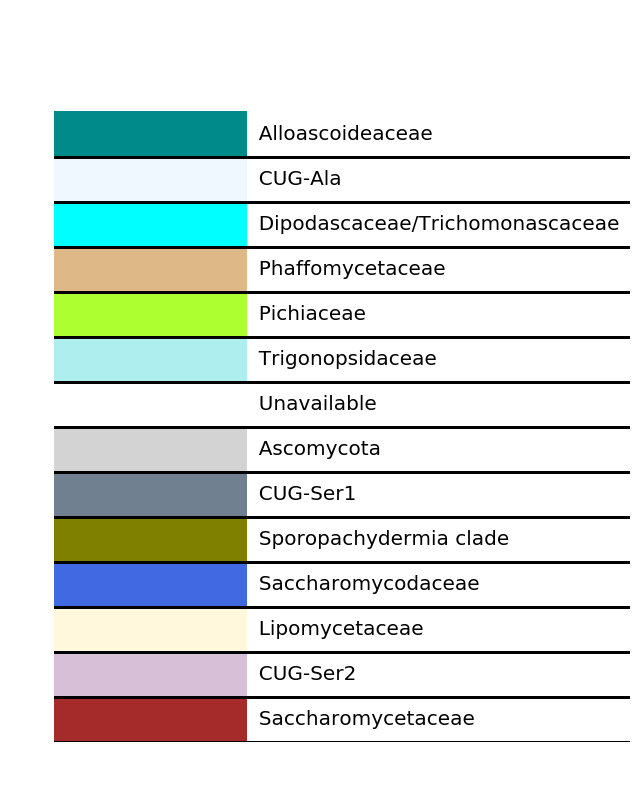

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import matplotlib.patches as mpatch

overlap = {name for name in mcd.CSS4_COLORS
           if "xkcd:" + name in mcd.XKCD_COLORS}

fig = plt.figure(figsize=[4, 5])
ax = fig.add_axes([0, 0, 1, 1])
j = 0
for n, v in order_color.items():
    weight = None
    cn = mcd.CSS4_COLORS[v]
    r2 = mpatch.Rectangle((0, j), 0.5,1, color=cn)

    txt = ax.text(0.5, j+.5, '  ' + n, va='center', fontsize=10,
                      weight=weight)
    #ax.add_patch(r1)
    ax.add_patch(r2)
    ax.axhline(j, color='k')
    j += 1

# ax.text(.5, j + 1.5, 'X11', ha='center', va='center')
ax.set_xlim(0, 1.5)
ax.set_ylim(0, j + 2)
ax.axis('off')
#fig.savefig(os.path.join(TREE_DIR,'overlap_legend_rokas.pdf'), transparent = True)

# Plot trees using only overlapping species

In [15]:
from ete3 import Tree, TextFace, NodeStyle, TreeStyle, AttrFace, faces
style = NodeStyle()
tree.set_outgroup( tree&"Schizosaccharomyces pombe" )
tree.ladderize()

def make_branches_bigger(node, new_size):
    node.img_style["hz_line_width"] = new_size # Change the horizotal lines stroke size
    node.img_style["vt_line_width"] = new_size # Change the vertical lines stroke size
    for c in node.children:
        make_branches_bigger(c, new_size)
        
        
def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=46)
        faces.add_face_to_node(N, node, 0, position='aligned')

In [16]:
from ete3 import Tree, TextFace, NodeStyle, TreeStyle
# t.set_outgroup( t&"Octopus vulgaris" )
# t.ladderize()
make_branches_bigger(rt, 8)
for leaf in rt.get_leaves():
    a = rt&leaf.name
    a.set_style(NodeStyle())
    sp_name = leaf.name
    a.img_style["hz_line_width"] = 8 # Change the horizotal lines stroke size
    a.img_style["vt_line_width"] = 8
    if sp_name in species_to_order.keys() and species_to_order[sp_name] != '':
        #print(leaf.name)
        a.img_style["bgcolor"] = order_color[str(species_to_order[sp_name])]
#     if leaf.name in gcov.keys():
#         a.img_style["size"] = xxs[leaf.name]*100
rt.ladderize()
ts = TreeStyle()
ts.show_scale = True
ts.show_leaf_name = False
ts.show_branch_support = False
ts.mode = 'c'
ts.layout_fn = layout
# rt.render(os.path.join(TREE_DIR,'overlap_rokas_rokas2.svg'), w=800, tree_style=ts)
rt.render(os.path.join(TREE_DIR, 'overlap_rokas_rokas2.svg'), h=400, units="mm", tree_style=ts, dpi=150)

# rt.render(os.path.join(TREE_DIR, 'overlap_rokas_rokas2a.svg'), h=400, units="mm", tree_style=ts, dpi=150)
# rt.render("%%inline",tree_style=ts)
#rt.show(tree_style=ts)

{'faces': [[1659.7215021103696,
   300.99372522448886,
   1855.681054123755,
   546.7306365300487,
   557,
   'Spathaspora passalidarum NRRL Y-27907 - ref'],
  [1456.5698742804225,
   275.7479106094446,
   1528.816527141576,
   430.28908406723303,
   528,
   'Wickerhamia fluorescens'],
  [1964.494865875637,
   1021.6807299522807,
   2112.9449362755254,
   1059.5912503225825,
   633,
   'Metschnikowia borealis'],
  [260.28626752549195,
   872.0861473242526,
   413.85571810813667,
   937.4691637101093,
   360,
   'Citeromyces hawaiiensis'],
  [1198.642890523486,
   216.49621596452997,
   1220.4884167697085,
   374.23440773936096,
   492,
   'Candida ascalaphidarum'],
  [1684.0626160290954,
   428.37620668313525,
   1803.825123724534,
   566.5115739683624,
   560,
   'Spathaspora sp. JK-2015c'],
  [662.643134161812,
   328.31988578783483,
   766.5953286053775,
   492.62339429680264,
   433,
   'Brettanomyces custersianus'],
  [867.6663537473586,
   290.2038654556276,
   922.2357326989393,

In [17]:
from ete3 import Tree, TextFace, NodeStyle, TreeStyle
# t.set_outgroup( t&"Octopus vulgaris" )
# t.ladderize()
make_branches_bigger(t, 4)
for leaf in t.get_leaves():
    a = t&leaf.name
    a.set_style(NodeStyle())
    sp_name = leaf.name
    a.img_style["hz_line_width"] = 4 # Change the horizotal lines stroke size
    a.img_style["vt_line_width"] = 4
    if sp_name in species_to_order.keys() and species_to_order[sp_name] != '':
        #print(leaf.name)
        a.img_style["bgcolor"] = order_color[str(species_to_order[sp_name])]
#     if leaf.name in gcov.keys():
#         a.img_style["size"] = xxs[leaf.name]*100
t.ladderize()
ts = TreeStyle()
ts.show_scale = True
ts.show_leaf_name = False
ts.show_branch_support = False
ts.mode = 'c'
ts.layout_fn = layout
# t.render(os.path.join(TREE_DIR,'overlap_rokas_r2t.pdf'), w=800, tree_style=ts)
t.render(os.path.join(TREE_DIR, 'overlap_rokas_r2t.svg'), h=400, units="mm", tree_style=ts, dpi=150)

#t.render(os.path.join(TREE_DIR,tree_file.split('.')[0]+'.c_family.pdf'), w=800, tree_style=ts)
# t.render(os.path.join(TREE_DIR, 'overlap_r2t_rokas2a.svg'), h=400, units="mm", tree_style=ts, dpi=150)
# t.render("%%inline",tree_style=ts)

{'faces': [[1900.6688436646293,
   683.2637759649464,
   2246.9164127795993,
   851.1498704589026,
   605,
   'Metschnikowia bicuspidata var. bicuspidata NRRL YB-4993'],
  [181.05444256357825,
   1144.5045475537243,
   373.69050303797394,
   1167.2912508672264,
   328,
   'Kazachstania bromeliacearum'],
  [1934.4197172147885,
   1411.3808853967969,
   2148.0454720917432,
   1493.1666582414339,
   34,
   'Lipomyces starkeyi NRRL Y-11557'],
  [1968.9329776176185,
   1061.4733414206391,
   2088.3495899004183,
   1090.424829448047,
   638,
   'Candida ipomoeae'],
  [255.0769218683283,
   1426.7780887815213,
   419.02138826930076,
   1492.79051265334,
   293,
   'Saccharomyces arboricola'],
  [294.2973251942363,
   1455.8293413015838,
   429.8735460124989,
   1517.983367981829,
   289,
   'Lachancea fermentati'],
  [556.8669752660376,
   436.89418719721965,
   665.1389309295594,
   565.7404469561593,
   417,
   'Ambrosiozyma maleeae'],
  [1337.3275825172536,
   257.27141313389654,
   1381.4

# Analyse trees

In [16]:
import dendropy
from dendropy import Tree
from dendropy.calculate import treecompare

def get_bcn(msp, rsp, rtree, mtree):
    all_sp_sets = []
    bcn = []
    mset = get_species_sets(msp, mtree)
    for node in rtree.preorder_node_iter():
        all_sp_sets.append([l.taxon.label for l in node.leaf_iter()])
    for s in all_sp_sets:
        bcn.append(get_jaccard_sim(mset, s))
    #print(bcn)
    return np.max(bcn)

## What is the robinson-foulds distance?

In [17]:
tns = dendropy.TaxonNamespace()

t_r2t = t.write(format=1).replace(" ","_")
tree_sample = Tree.get(data=t_r2t,schema="newick",taxon_namespace=tns)
tree_sample.encode_bipartitions()

t_rokas = rt.write(format=1).replace(" ","_")
tree_ref =  Tree.get(data=t_rokas,schema="newick",taxon_namespace=tns)
tree_ref.encode_bipartitions()

t_ncbi = tree.write(format=1).replace(" ","_")
tree_ncbi =  Tree.get(data=t_ncbi,schema="newick",taxon_namespace=tns)
tree_ncbi.encode_bipartitions()


print(treecompare.symmetric_difference(tree_sample, tree_ncbi))
print(treecompare.symmetric_difference(tree_ref, tree_ncbi))
print(treecompare.symmetric_difference(tree_ref, tree_sample))

297
291
128


In [22]:
from ete3 import Tree as eTree

et = eTree(str(tree_ref)+";")
et2 = eTree(str(tree_sample)+";")
et3 = eTree(str(tree_ncbi)+";")
diff_r2t_rokas = et2.compare(et,unrooted=True)
diff_r2t_ncbi = et2.compare(et3,unrooted=True)
diff_rokas_ncbi = et.compare(et3,unrooted=True)
print('Nrf(r2t, rokas): {}'.format(diff_r2t_rokas["norm_rf"]))
print('Nrf(r2t, ncbi): {}'.format(diff_r2t_ncbi["norm_rf"]))
print('Nrf(rokas, ncbi): {}'.format(diff_rokas_ncbi["norm_rf"]))

Nrf(r2t, rokas): 0.2
Nrf(r2t, ncbi): 0.7443609022556391
Nrf(rokas, ncbi): 0.7293233082706767


## Remove all species that cannot be classified in specific groupings


In [32]:
to_keep = [sp for sp in t.get_leaf_names() if sp in species_to_order.keys()]
print('We keep {} species and remove {} without classification.'.format(len(to_keep), len(t.get_leaf_names())-len(to_keep)))
t.prune(to_keep)
rt.prune(to_keep)
        

We keep 323 species and remove 0 without classification.


## Assess monophyly

In [51]:
# IMPORTANT: update of the database doesn't have to be done constantly
#ncbi.update_taxonomy_database()
# possibilities: ['no rank', 'no rank', 'superkingdom', 'no rank', 'family', 'no rank', 
#                 'subphylum', 'kingdom', 'subkingdom', 'species', 'phylum', 'class', 'order', 'genus']


# species_to_order = {}
# for k,v in name2taxid.items():
#     lineage = ncbi.get_lineage(v[0])
#     rank = ncbi.get_rank(lineage)
# #     print(list(rank.values()))
#     for i,d in rank.items():
#         if 'family' == d:
#             species_to_order[k] = i
#     if k not in species_to_order.keys():
#         species_to_order[k] = 1
# order_to_species = {}
# for k,v in species_to_order.items():
#     if v in order_to_species.keys():
#         order_to_species[v].append(k)
#     else:
#         order_to_species[v] = [k]

# order_to_species = {k:list(set(v).intersection(set(t.get_leaf_names()))) for k,v in order_to_species.items()}


def find_monophyletic_max(x,t):
    z = 0.0
    zk = 1
    res = []
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        leaf_intersection = leaves_at_node & x
        y1 = len(leaf_intersection) / len(leaves_at_node) # is 1 if there is a node that has all the leaves
        y2 = len(leaf_intersection) / len(x) # is 1 if there is a node where the intersection has all the leaves
#         ydiff = abs(y1 - y2)
        if y1 > 0 and y2 > 0:
            if y1 > y2:
                ydiff = 1-(y2/y1)
            if y2 > y1:
                ydiff = 1-(y1/y2)
#             ydiff = abs(y1 - y2) # is 0 if all species part of clade are at that node and have no other species
#             ysum = y1 + y2
            if ydiff < zk and y1 > z and ydiff != 0:
#                 print('y1: {}\t y2: {}\t ydiff:{}'.format(y1,y2,ydiff))
                zk = ydiff
                z = y1
                res.append(y1)
    if res:
        return res[-1]
    else:
#         print(y1, y2)
        return None

def find_monophyletic(x,t):
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        support = node.support
        if len(leaves_at_node - x) == 0 and len(leaves_at_node) > 1:
            yield len(leaves_at_node & x),support
            
            
def find_monophyletic_max2(x,t):
    z = 0.0
    zk = 1
    res = []
    for node in t.traverse():
        leaves_at_node = set(node.get_leaf_names())
        leaf_intersection = leaves_at_node & x
        if len(leaf_intersection) > 0:
            if len(leaves_at_node) <= len(x):
    #             print('l<=l: {}'.format(len(leaves_at_node)/len(x)))
                y = len(leaves_at_node)/len(x)
#                 if y == 1:
#                     print(x)
#                     print(leaves_at_node)
#                     print(len(leaves_at_node))
            else:
    #             print('x<l: {}'.format(len(x)/len(leaves_at_node)))
                y = len(x)/len(leaves_at_node)
#                 if y > 0.9:
#                     print(leaves_at_node)
#                     print(len(leaves_at_node))
#         else:
#             print('here')
#         print(y)
        res.append(y)
    if res:
        return max(res)
    else:
        return 0.0

In [35]:
max(list(find_monophyletic(set(order_to_species['Phaffomycetaceae']),rt)))

(34, 1.0)

In [36]:
find_monophyletic_max2(set(order_to_species['Dipodascaceae/Trichomonascaceae']),t)

0.9622641509433962

### Monophyly as node that has highest number of species only part of predefined monophyletic grouping

In [37]:
species_part_of_low_monophyly = []
species_part_of_high_monophyly = []
r2t_mono = []
rokas_mono = []
order = []

for k,v in order_to_species.items():
    if len(v) > 1:
        x = list(find_monophyletic(set(v),t))
        x_denominator = len(v)-1
        if len(x)>0:
            x_mono = max(x)
            x_score = x_mono[0]-1
            x_support = x_mono[1]
            if (x_support > 1):
                x_support = x_support/100
            x_numerator = x_score*x_support
        else:
            x_numerator=0
            x_score=0
        x = x_numerator/x_denominator
        
        y = list(find_monophyletic(set(v),rt))
        y_denominator = len(v)-1
        if len(y)>0:
            y_mono = max(y)
            y_score = y_mono[0]-1
            y_support = y_mono[1]
            if (y_support > 1):
                y_support = y_support/100
            y_numerator = y_score*y_support
        else:
            y_numerator=0
            y_score=0
        y = y_numerator/y_denominator
        
        if x and y:
            r2t_mono.append(x)
            rokas_mono.append(y)
        elif x and not y:
            r2t_mono.append(x)
            rokas_mono.append(None)
#             print('Read2Tree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
        elif y and not x:
            rokas_mono.append(y)
            r2t_mono.append(None)
#             print('RokasTree: family {} has mono {}'.format(ncbi.get_taxid_translator([k])[k],mono))
        if x or y:
            order.append(k)
#             order.append(ncbi.get_taxid_translator([k])[k])
df_mono = pd.DataFrame({'r2t':r2t_mono, 'rokas':rokas_mono},index=order)
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff')
df_mono_sorted

,r2t,rokas,diff
Saccharomycetaceae,0.180851,0.659574,-0.478723
Dipodascaceae/Trichomonascaceae,0.574200,0.680000,-0.105800
Ascomycota,0.565833,0.583333,-0.017500
CUG-Ser1,0.743590,0.743590,0.000000
Pichiaceae,0.826087,0.826087,0.000000
CUG-Ser2,0.750000,0.750000,0.000000
Phaffomycetaceae,1.000000,1.000000,0.000000
Trigonopsidaceae,1.000000,1.000000,0.000000
Saccharomycodaceae,1.000000,1.000000,0.000000
Lipomycetaceae,0.888889,0.888889,0.000000


In [ ]:
ax = df_mono_sorted.plot.bar(rot=0)
ax.set_xticklabels(df_mono_sorted.index, rotation=90)
ax
plt.savefig(os.path.join(TREE_DIR,'overlap_monophyly_rokas2a.pdf'))        
# use ratio instead

### Monophyly as node that has highest number of species as proportion of monophyletic grouping

In [55]:
order_to_species['']

['Ashbya gossypii NRRL Y-1056',
 'Candida aaseri',
 'Candida batistae',
 'Candida bombi',
 'Candida californica',
 'Candida davenportii',
 'Candida geochares',
 'Candida gropengiesseri',
 'Candida magnoliae',
 'Candida metapsilosis',
 'Candida norvegica',
 'Candida pseudohaemulonis',
 'Candida sorbosivorans',
 'Candida sp. JCM 15000',
 'Candida stellata',
 'Candida torresii',
 'Candida tropicalis CBS 94',
 'Cochliobolus lunatus',
 'Diutina catenulata',
 'Passalora fulva',
 'Saccharomycodes ludwigii',
 'Thielavia heterothallica',
 'Trichomonascus petasosporus',
 'Zymoseptoria tritici']

In [52]:
species_part_of_low_monophyly = []
r2t_mono = []
rokas_mono = []
order = []
out_dic = {'r2t':[], 'rokas':[], 'num_order':[]}
for k,v in order_to_species.items():
    print(k)
    if len(v) > 1:
        x = find_monophyletic_max2(set(v),t)
        y = find_monophyletic_max2(set(v),rt)
        if x != 0 or y != 0:
            out_dic['r2t'].append(x)
            out_dic['rokas'].append(y)
            order.append(k)
            out_dic['num_order'].append(len(v))
# df_mono = pd.DataFrame(out_dic, index=order)
df_mono = pd.DataFrame({'r2t': out_dic['r2t'], 'rokas':out_dic['rokas']}, index=order)
df_mono['diff'] = df_mono['r2t']-df_mono['rokas']
if 'root' in order:
    df_mono = df_mono.drop('root')
df_mono['diff'] = df_mono.r2t - df_mono.rokas
df_mono_sorted = df_mono.sort_values(by='diff').dropna()
df_mono_sorted

CUG-Ser1
Alloascoideaceae
Pichiaceae
Ascomycota
CUG-Ser2
Saccharomycetaceae



UnboundLocalError: local variable 'y' referenced before assignment

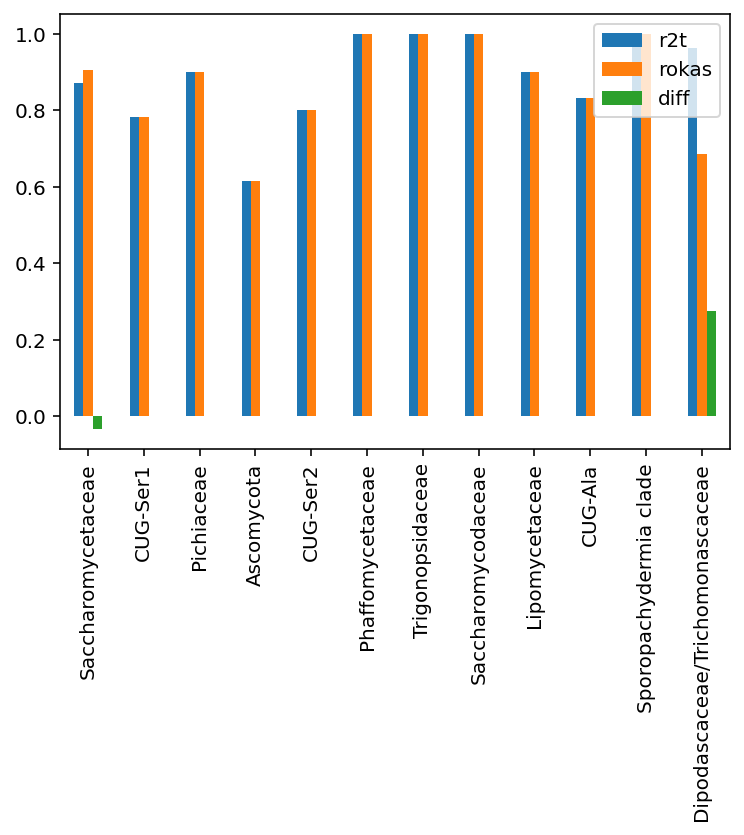

In [50]:
import matplotlib.pyplot as plt

ax = df_mono_sorted.plot.bar(rot=0)
ax.set_xticklabels(df_mono_sorted.index, rotation=90)
ax
plt.savefig(os.path.join(TREE_DIR,'overlap_monophyly_max_rokas2a.pdf'))        
# use ratio instead

In [ ]:
ax = df_mono_sort.plot.line(rot=0)
ax.set_xticklabels(df_mono_sort.index, rotation=90)
ax

In [ ]:
rt.get_leaf_names()